In [1]:
from openvino.runtime import Core
import numpy as np
import torch.nn as nn
from colors import _COLORS
from infer_yolox import run_yolox_inference, YoloXOpenVinoInference
from decord import VideoReader
from decord import cpu, gpu

vr = VideoReader('inputvideo.mp4', ctx=cpu(0))

print(len(vr))

3016


In [2]:
model_path = r'public\yolox-tiny\FP32\yolox-tiny.xml'
classes_file = r"public\yolox-tiny\coco.names"

yolox = YoloXOpenVinoInference(model_path, classes_file, device="GPU", confidence=0.5)

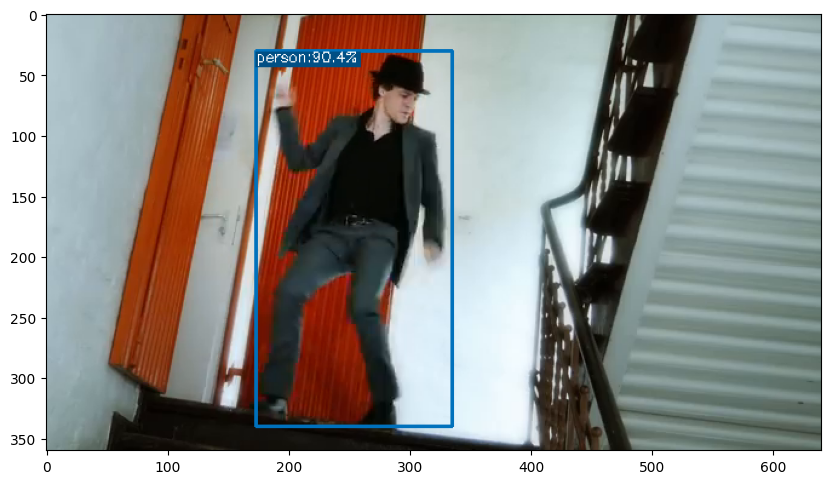

In [3]:
# for image inference
image = vr[420].asnumpy()
boxes, scores, class_indices, class_names, output_img = yolox.inference(image,
                                                                        show_results=True)

In [ ]:
# for video inference 
yolox.video_inference('inputvideo.mp4', 
                      'outputvideo.mp4',
                      show_results=True)